In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [4]:
def load_images_from_folder(folder, label, size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            img_array = np.array(img).flatten() / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)
    return images, labels

# Load trendy and not trendy images
trendy_imgs, trendy_labels = load_images_from_folder("D:/fashiontrendanalysis/trend_imgs/", label=1)
not_trendy_imgs, not_trendy_labels = load_images_from_folder("D:/fashiontrendanalysis/non-trend_imgs/", label=0)

# Combine data
X = np.array(trendy_imgs + not_trendy_imgs)
y = np.array(trendy_labels + not_trendy_labels)

print(f"Shape of feature data: {X.shape}")
print(f"Number of samples: {len(y)}")


Shape of feature data: (200, 12288)
Number of samples: 200


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.775

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.88      0.67      0.76        21

    accuracy                           0.78        40
   macro avg       0.79      0.78      0.77        40
weighted avg       0.80      0.78      0.77        40



In [8]:
def predict_image(path, model, size=(64, 64)):
    img = Image.open(path).convert('RGB')
    img = img.resize(size)
    img_array = np.array(img).flatten() / 255.0
    img_array = img_array.reshape(1, -1)
    prediction = model.predict(img_array)[0]
    print("Prediction:", "Trendy" if prediction == 1 else "Not Trendy")

# Example usage
predict_image("D:\\fashiontrendanalysis\\original.jpg", model)

Prediction: Not Trendy


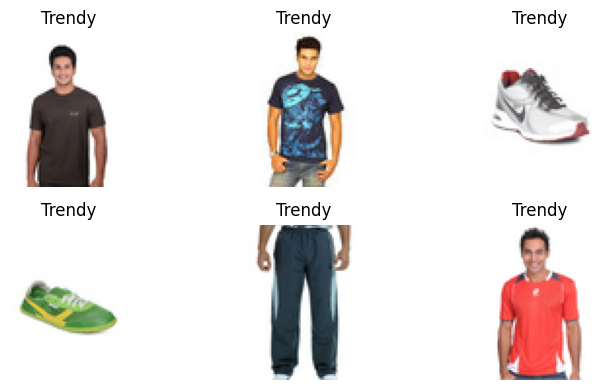

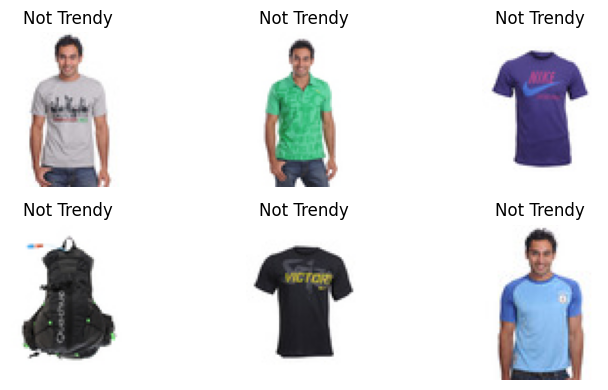

In [9]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

def show_sample_images(folder_path, label_name):
    plt.figure(figsize=(8, 4))
    images = os.listdir(folder_path)
    for i in range(6):
        plt.subplot(2, 3, i+1)
        img = Image.open(os.path.join(folder_path, random.choice(images)))
        plt.imshow(img)
        plt.axis('off')
        plt.title(label_name)
    plt.tight_layout()
    plt.show()

show_sample_images("D:/fashiontrendanalysis/trend_imgs/", "Trendy")
show_sample_images("D:/fashiontrendanalysis/non-trend_imgs/", "Not Trendy")


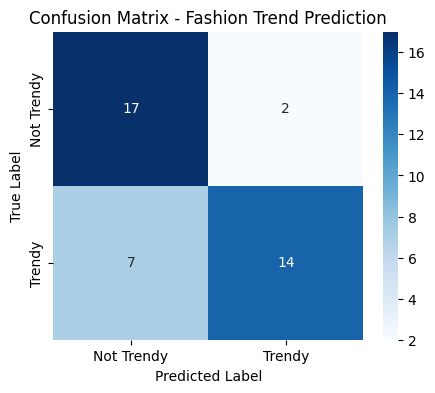

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Trendy', 'Trendy'], yticklabels=['Not Trendy', 'Trendy'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fashion Trend Prediction")
plt.show()

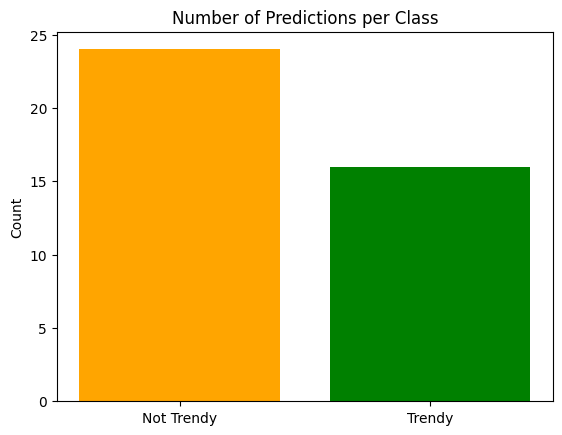

In [11]:
import numpy as np

unique, counts = np.unique(y_pred, return_counts=True)
plt.bar(['Not Trendy', 'Trendy'], counts, color=['orange', 'green'])
plt.title("Number of Predictions per Class")
plt.ylabel("Count")
plt.show()

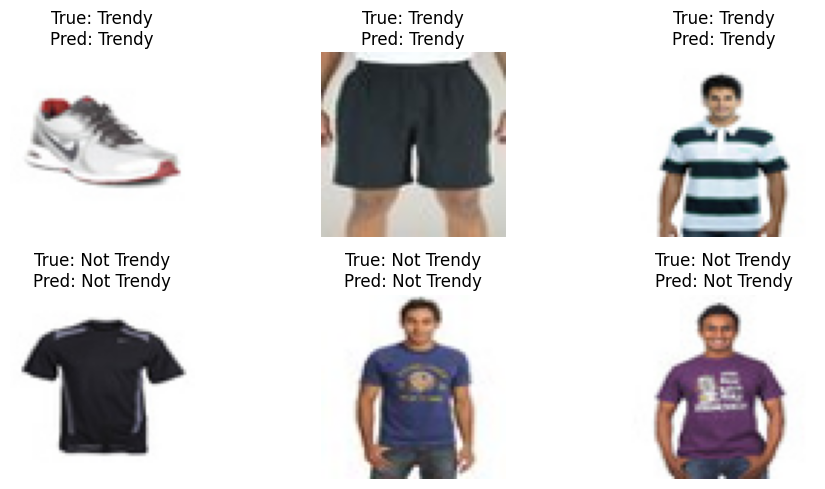

In [12]:
def visualize_predictions(X_test, y_test, y_pred, num_images=6, size=(64,64)):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 3, i+1)
        img = X_test[i].reshape(*size, 3)
        plt.imshow(img)
        true_label = "Trendy" if y_test[i] == 1 else "Not Trendy"
        pred_label = "Trendy" if y_pred[i] == 1 else "Not Trendy"
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Since X_test was flattened, reshape before visualization
visualize_predictions(X_test, y_test, y_pred)

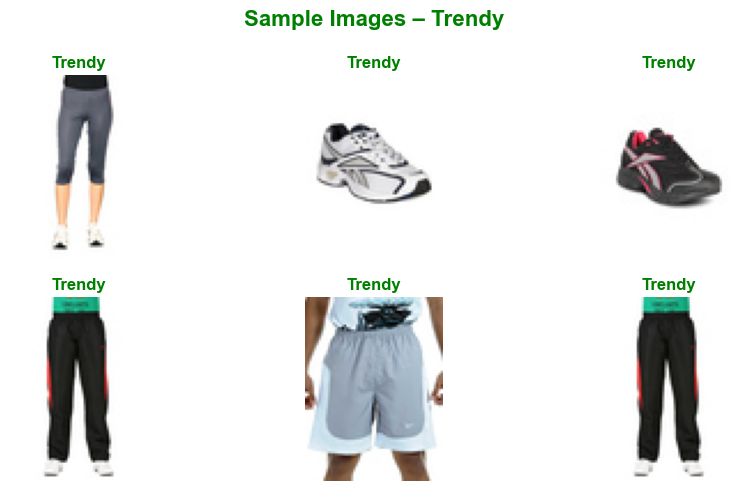

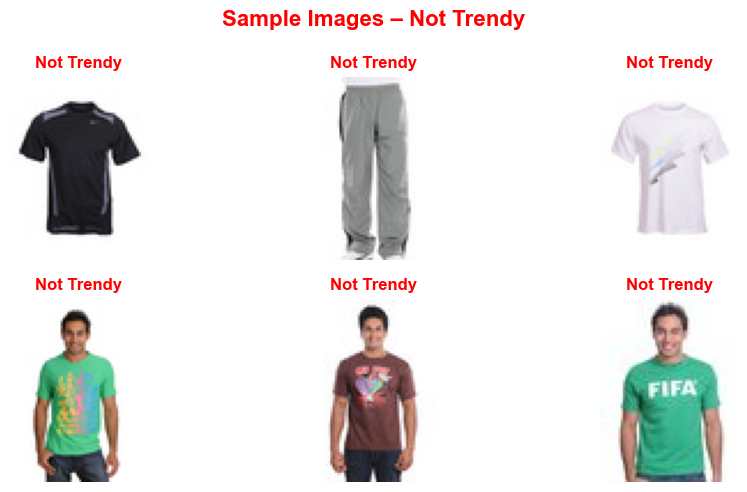

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import random

sns.set(style="whitegrid")

def show_sample_images(folder_path, label_name, color):
    plt.figure(figsize=(10, 5))
    images = os.listdir(folder_path)
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        img = Image.open(os.path.join(folder_path, random.choice(images)))
        plt.imshow(img)
        plt.axis('off')
        plt.title(label_name, color=color, fontsize=12, fontweight='bold')
    plt.suptitle(f"Sample Images – {label_name}", fontsize=16, fontweight='bold', color=color)
    plt.tight_layout()
    plt.show()

show_sample_images("D:/fashiontrendanalysis/trend_imgs/", "Trendy", "green")
show_sample_images("D:/fashiontrendanalysis/non-trend_imgs/", "Not Trendy", "red")
